In [9]:
import tushare as ts
import pandas as pd
from datetime import datetime

In [10]:
# ed = datetime.strftime(datetime.now(), '%Y-%m-%d')
# st = datetime.strftime(datetime(datetime.today().year - 1,
#                                          datetime.today().month, 
#                                          datetime.today().day), '%Y-%m-%d')
# df_source = ts.get_hist_data('600519', start=st, end=ed)
df_source = ts.get_hist_data('600519')
# df_source.truncate(after='2017-01-01')

In [11]:
ser_close = df_source['close'].sort_index()

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline  
# #notebook模式下

from pylab import *
# %pylab inline   
#ipython模式下

# style.use('ggplot')
# print(plt.style.available)

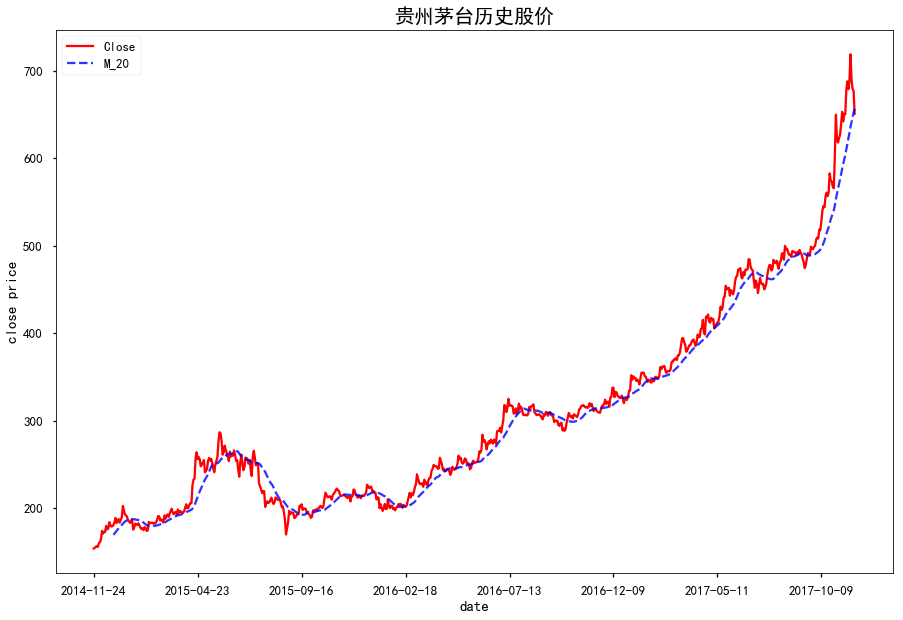

In [23]:
style.use(plt.style.available[18])
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 10))
ser_close.plot(kind='line', c='r', label='Close')
ser_close.rolling(window=20).mean().plot(kind='line', c='b', ls='--', alpha=.8, label='M_20')
plt.legend(loc='best')

plt.xlabel('date', size=15)
plt.ylabel('close price', size=15)
plt.title('贵州茅台历史股价', size=20)
plt.show()

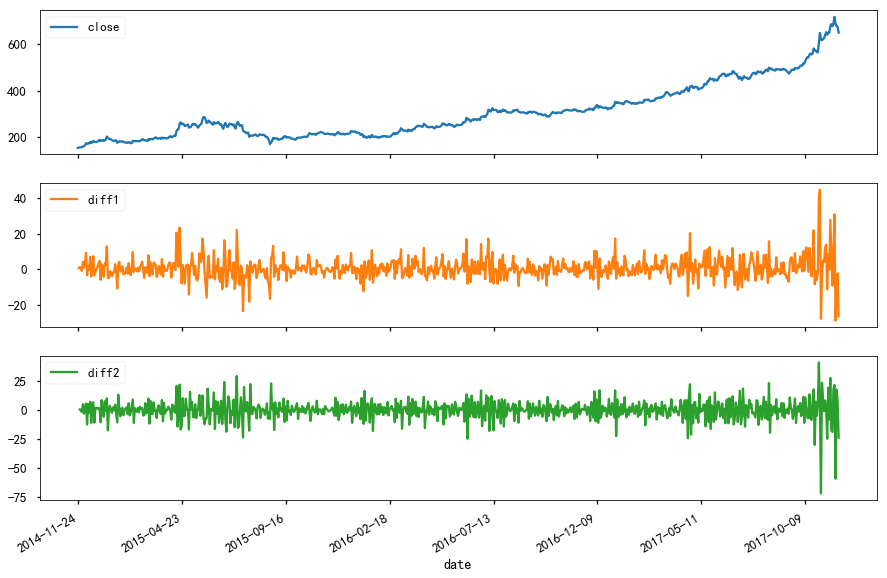

In [24]:
df_close = pd.DataFrame(data=ser_close, index=ser_close.index)
df_close['diff1'] = df_close['close'].diff(1)
df_close['diff2'] = df_close['diff1'].diff(1)
df_close.plot(subplots=True, figsize=(15, 10), legend='0')
plt.show()

In [25]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

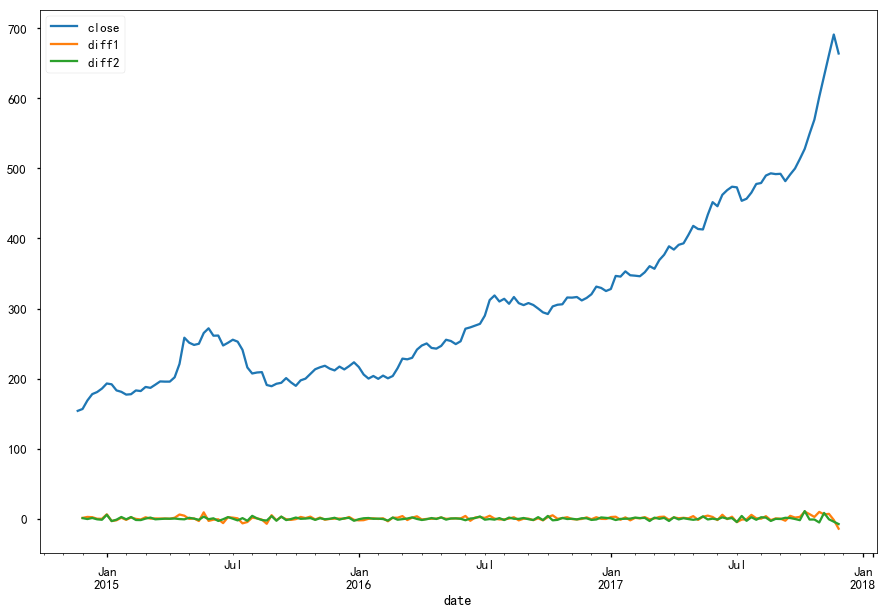

In [26]:
df_close.index = pd.to_datetime(df_close.index)
df_close_resample = df_close.resample('W-MON').mean()
df_close_resample.plot(figsize=(15, 10))

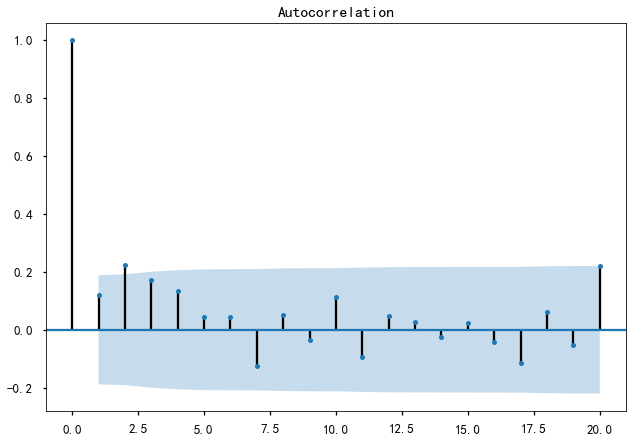

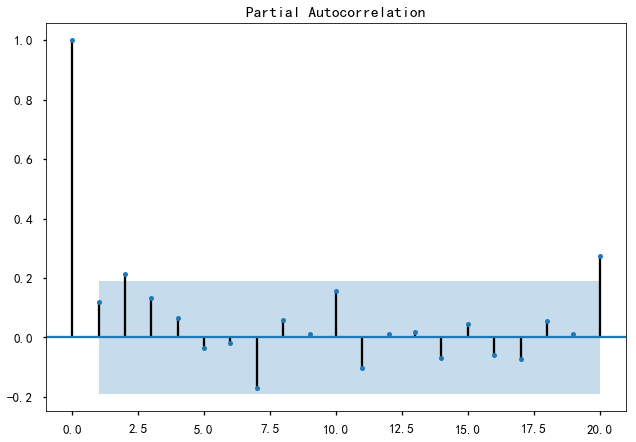

In [32]:
# stk_train_set = df_close.truncate(after = '2017-10-01')

stk_train_set = df_close_resample['2015-11-01':'2017-11-22']
train_dif1 = stk_train_set['diff1'].dropna()
acf_dif = plot_acf(train_dif1, lags=20)
pacf_dif = plot_pacf(train_dif1, lags=20)

In [37]:
model = ARIMA(stk_train_set['close'], order=(1, 1, 1), freq='W-MON')
arima_result = model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -377.531
Method:                       css-mle   S.D. of innovations              8.223
Date:                Wed, 22 Nov 2017   AIC                            763.062
Time:                        23:25:57   BIC                            773.753
Sample:                    11-09-2015   HQIC                           767.396
                         - 11-20-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6293      3.087      1.824      0.071      -0.420      11.679
ar.L1.D.close     0.8928      0.108      8.292      0.000       0.682       1.104
ma.L1.D.close    -0.5913      0.157     -3.756      0.000      -0.900      -0.283
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1200           +0.0000j            1.1200            0.0000
MA.1            1.6912           +0.0000j            1.6912            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
pred_vals = arima_result.predict(start=len(stk_train_set['close']) - 9, end=len(stk_train_set['close']) + 6,
                                 dynamic=True, typ='levels')

Text(0.5,1,'ARIMA模型 贵州茅台股价预测')

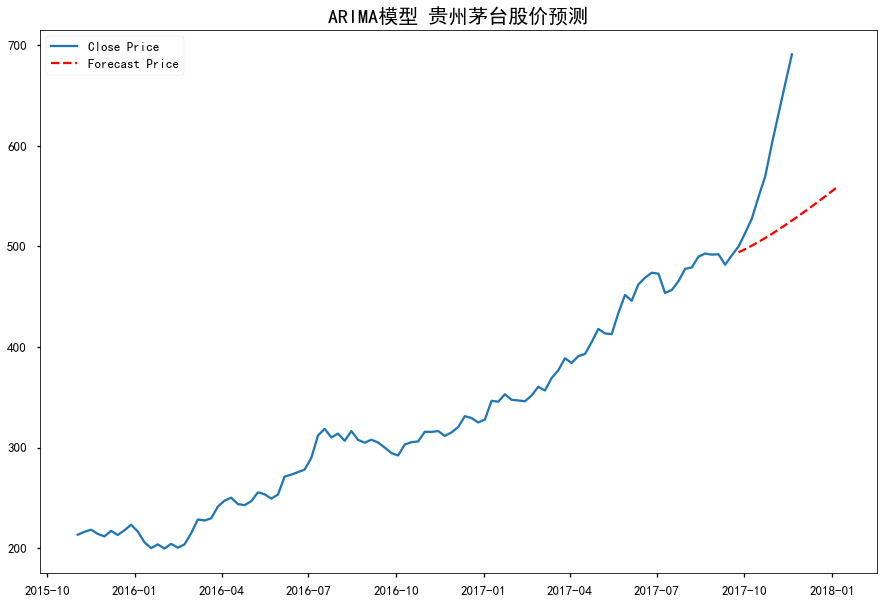

In [35]:
stock_forcast = pd.concat([stk_train_set['close'], pred_vals], keys=['Close_Price', 'Forecast_Price'])

plt.figure(figsize=(15, 10))
plt.plot(stock_forcast['Close_Price'])
plt.plot(stock_forcast['Forecast_Price'], c='r', ls='--')
plt.legend(['Close Price', 'Forecast Price'])
plt.title('ARIMA模型 贵州茅台股价预测', size=20)

In [36]:
# arima_result.summary()